In [114]:
import numpy as np
import networkx as nx

In [104]:
class node():
    def __init__(self, identifier, inclination, edges_to = None, edges_from = None, node_connection_bias = None):
        self.uniq_id = identifier
        self.forward_connections = edges_to
        self.backward_connections = edges_from
        self.connection_bias = node_connection_bias
        self.inclination = inclination
    def __str__(self):
        return("ID: "+str(self.uniq_id)+
#               "\n forward_connections "+self.forward_connections +
#               "\n backward_connections "+self.backward_connections+
#               "\n connection_bias "+self.connection_bias+
              "\n inclination "+ str(self.inclination))
class space():
    
    def return_nodes(self):
        return(self.node_list)
    
    def num_nodes(self):
        return(len(self.node_list))
    
    def return_node_list(self, node_type):
        if node_type == 'producer' or node_type == 0:
            return(self.node_list[0:num_producers])
        elif node_type == 'transmitter' or node_type == 1:
            return(self.node_list[num_producers:(num_transmitters+num_producers)])
        else:
            return(self.node_list[-num_consumers:])
    
    def add_node(self, node, node_type, position_for_node = (0, 0)):
        if node_type == 'producer':
            self.node_list.insert(self.num_producers, node) 
            self.num_producers+=1
        elif node_type == 'transmitter':
            self.node_list.insert(self.num_transmitters, node) 
            self.num_transmitters+=1
        else:
            self.node_list.append(node) 
            self.num_consumers += 1
        self.node_position[node.uniq_id] = (position_for_node[0], position_for_node[1])
        
    def __init__(self, num_producers = 0, num_transmitters = 0, num_consumers = 0):
        self.num_producers = num_producers
        self.num_consumers = num_consumers
        self.num_transmitters = num_transmitters
        self.node_list = [node(i, 0) for i in range(num_producers+num_consumers+num_transmitters)]
        self.node_position = {int:(int, int)}
        
    def make_consumers(self):
#     consumer_list = [t.uniq_id for t in (with_space.return_node_list('consumer'))]
        for consumer in self.return_node_list('consumer'):
    #         my_connections = np.random.choice(consumer_list, np.random.randint(int(len(consumer_list)/2), len(consumer_list)), replace=False)
    #         transmitter.forward_connections = my_connections
            consumer.inclination = int(np.random.randint(2, 100))
            consumer.backward_connections = []
            consumer.connection_bias = {}
            for transmitter in self.return_node_list('transmitter'):
                if (consumer.uniq_id in transmitter.forward_connections):
                    consumer.backward_connections.append(transmitter.uniq_id)
                    consumer.connection_bias[transmitter.uniq_id] = np.random.randint(-100, 100)/100
            if (consumer.backward_connections == []):
                # Get a random producer
                num_add_transmitter = np.random.randint(1, 3)
                while(num_add_transmitter > 0):
                    num_add_transmitter -= 1
                    my_transmitter = np.random.randint(len(self.return_node_list('transmitter')))
                    my_transmitter = test_space.return_node_list('transmitter')[my_transmitter]
                    if my_transmitter.uniq_id in consumer.backward_connections:
                        continue
                    consumer.backward_connections.append(my_transmitter.uniq_id)
                    consumer.connection_bias[my_transmitter.uniq_id] = np.random.randint(-100, 100)/100
                    my_transmitter.forward_connections.append(consumer.uniq_id)
    
    def make_transmitters(self):
        consumer_list = [t.uniq_id for t in (self.return_node_list('consumer'))]
        for transmitter in self.return_node_list('transmitter'):
            my_connections = np.random.choice(consumer_list, np.random.randint(int(len(consumer_list)/2), len(consumer_list)), replace=False)
            transmitter.forward_connections = list(my_connections)
            transmitter.inclination = int(np.random.randint(2, 100))
            transmitter.backward_connections = []
            transmitter.connection_bias = {}
            for producer in self.return_node_list('producer'):
                if (transmitter.uniq_id in producer.forward_connections):
                    transmitter.backward_connections.append(producer.uniq_id)
                    transmitter.connection_bias[producer.uniq_id] = np.random.randint(-100, 100)/100
            if (transmitter.backward_connections == []):
                # Get a random producer
                my_producer = np.random.randint(len(self.return_node_list('producer')))
                my_producer = test_space.return_node_list('producer')[my_producer]
                transmitter.backward_connections.append(my_producer.uniq_id)
                transmitter.connection_bias[my_producer.uniq_id] = np.random.randint(-100, 100)/100
                my_producer.forward_connections.append(transmitter.uniq_id)

    def make_producers(self):
        bias_list = [25, 50, 75]
        transmitter_list = [t.uniq_id for t in (self.return_node_list('transmitter'))]
        for producer_node in self.return_node_list('producer'):
            my_connections = np.random.choice(transmitter_list, np.random.randint(int(len(transmitter_list)/2), len(transmitter_list)), replace=False)
            producer_node.forward_connections = list(my_connections)
            producer_node.inclination = int(np.random.choice(bias_list, 1))
            bias_list.remove(producer_node.inclination)
    def make_all():
        make_producers()
        make_transmitters()
        make_consumers()
        
    def __str__(self):
        return ("Instance of Space, use .desribe to learn more")
    
    def describe(self):
        return ("space with \n" 
                + str(self.num_producers) +" producers, \n" 
                      + str(self.num_transmitters) +" transmitters and\n" 
                      + str(self.num_consumers)+ " consumers.")

In [105]:
x = node(111, 1)

In [106]:
print(x.uniq_id)

111


In [107]:
y = space()

In [108]:
y.add_node(x, 'producer')

In [109]:
assert(y.node_list[0] == x)
print(y.describe())

space with 
1 producers, 
0 transmitters and
0 consumers.


In [110]:
num_producers = 3
num_transmitters = 5
num_consumers = 10
total_nodes = [i for i in range(num_producers + num_transmitters + num_consumers)]
producer_ids = total_nodes[:num_producers]
transmitter_ids = total_nodes[:]
test_space = space(num_producers, num_transmitters, num_consumers)

In [111]:
print(test_space.describe())
for producer_node in test_space.return_node_list('producer'):
    print(producer_node.forward_connections)

space with 
3 producers, 
5 transmitters and
10 consumers.
None
None
None


In [112]:
def make_producers(with_space):
    bias_list = [25, 50, 75]
    transmitter_list = [t.uniq_id for t in (with_space.return_node_list('transmitter'))]
    for producer_node in test_space.return_node_list('producer'):
        my_connections = np.random.choice(transmitter_list, np.random.randint(int(len(transmitter_list)/2), len(transmitter_list)), replace=False)
        producer_node.forward_connections = list(my_connections)
        producer_node.inclination = int(np.random.choice(bias_list, 1))
        bias_list.remove(producer_node.inclination)
# node creation for producer test
transmitter_list = [t.uniq_id for t in (test_space.return_node_list('transmitter'))]
# Pick 1-3 with mean 2
my_connections = np.random.choice(transmitter_list, np.random.randint(2, len(transmitter_list)), replace=False)
print(my_connections, transmitter_list)

[7 4 5] [3, 4, 5, 6, 7]


In [113]:
make_transmitters(test_space)

TypeError: argument of type 'NoneType' is not iterable

In [114]:
def make_transmitters(with_space):
    consumer_list = [t.uniq_id for t in (with_space.return_node_list('consumer'))]
    for transmitter in test_space.return_node_list('transmitter'):
        my_connections = np.random.choice(consumer_list, np.random.randint(int(len(consumer_list)/2), len(consumer_list)), replace=False)
        transmitter.forward_connections = list(my_connections)
        transmitter.inclination = int(np.random.randint(2, 100))
        transmitter.backward_connections = []
        transmitter.connection_bias = {}
        for producer in test_space.return_node_list('producer'):
            if (transmitter.uniq_id in producer.forward_connections):
                transmitter.backward_connections.append(producer.uniq_id)
                transmitter.connection_bias[producer.uniq_id] = np.random.randint(-100, 100)/100
        if (transmitter.backward_connections == []):
            # Get a random producer
            my_producer = np.random.randint(len(test_space.return_node_list('producer')))
            my_producer = test_space.return_node_list('producer')[my_producer]
            transmitter.backward_connections.append(my_producer.uniq_id)
            transmitter.connection_bias[my_producer.uniq_id] = np.random.randint(-100, 100)/100
            my_producer.forward_connections.append(transmitter.uniq_id)

In [115]:
for transmitter in test_space.return_node_list('transmitter'):
    print(transmitter.inclination)

17
0
0
0
0


In [116]:
def make_consumers(with_space):
#     consumer_list = [t.uniq_id for t in (with_space.return_node_list('consumer'))]
    for consumer in test_space.return_node_list('consumer'):
#         my_connections = np.random.choice(consumer_list, np.random.randint(int(len(consumer_list)/2), len(consumer_list)), replace=False)
#         transmitter.forward_connections = my_connections
        consumer.inclination = int(np.random.randint(2, 100))
        consumer.backward_connections = []
        consumer.connection_bias = {}
        for transmitter in test_space.return_node_list('transmitter'):
            if (consumer.uniq_id in transmitter.forward_connections):
                consumer.backward_connections.append(transmitter.uniq_id)
                consumer.connection_bias[transmitter.uniq_id] = np.random.randint(-100, 100)/100
        if (consumer.backward_connections == []):
            # Get a random producer
            num_add_transmitter = np.random.randint(1, 3)
            while(num_add_transmitter > 0):
                num_add_transmitter -= 1
                my_transmitter = np.random.randint(len(test_space.return_node_list('transmitter')))
                my_transmitter = test_space.return_node_list('transmitter')[my_transmitter]
                if my_transmitter.uniq_id in consumer.backward_connections:
                    continue
                consumer.backward_connections.append(my_transmitter.uniq_id)
                consumer.connection_bias[my_transmitter.uniq_id] = np.random.randint(-100, 100)/100
                my_transmitter.forward_connections.append(consumer.uniq_id)

In [117]:
make_consumers(test_space)

TypeError: argument of type 'NoneType' is not iterable

In [118]:
for consumer in test_space.return_node_list('consumer'):
    print(consumer.inclination)

41
0
0
0
0
0
0
0
0
0


In [528]:
def remake_all(test_space, num_producers = 3, num_transmitters = 5, num_consumers = 10):
    test_space = space(num_producers, num_transmitters, num_consumers)
    test_space.make_producers()
    test_space.make_transmitters()
    test_space.make_consumers()
    return test_space

In [32]:
#         self.forward_connections = edges_to
#         self.backward_connections = edges_from
#         self.connection_bias = node_connection_bias
#         self.inclination = inclination
def calculator(test_space, just_type = -1):
    bias_list = []
    inclination_list = []
    forward_connection_list = []
    backward_connection_list = []
    node_list = test_space.return_nodes()
    if just_type != -1:
        node_list = test_space.return_node_list(just_type)
    for node in node_list:
        bias_list.append(node.connection_bias)
        inclination_list.append(node.inclination)
        forward_connection_list.append(node.forward_connections)
        backward_connection_list.append(node.backward_connections)
    results = {}
    results['bias'] = bias_list
    results['inclination'] = inclination_list
    results['forward'] = forward_connection_list
    results['backward'] = backward_connection_list
    return results

In [121]:
res = calculator(test_space)

In [122]:
print(res['inclination'])

[0, 0, 0, 17, 0, 0, 0, 0, 41, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [123]:
import matplotlib.pyplot as plt

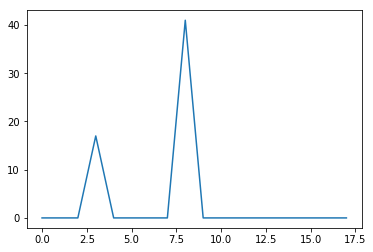

In [124]:
plt.plot(res['inclination'])

In [125]:
def generate_info(test_space):
    producers = test_space.return_node_list(0)
    print(producers[0].inclination)
    producer_dictionary = {}
generate_info(test_space)

0


In [130]:
test_space = remake_all(test_space)
test_space.make_all()

TypeError: make_all() takes 0 positional arguments but 1 was given

In [127]:
def run(test_space)

SyntaxError: invalid syntax (<ipython-input-127-4af6fa498982>, line 1)

In [101]:
class node():
    def __init__(self, identifier, inclination, edges_to = None, edges_from = None, node_connection_bias = None):
        self.uniq_id = identifier
        self.forward_connections = edges_to
        self.backward_connections = edges_from
        self.connection_bias = node_connection_bias
        self.inclination = inclination
        self.info_recieved = []
    def __str__(self):
        return("ID: "+str(self.uniq_id)+
#               "\n forward_connections "+self.forward_connections +
#               "\n backward_connections "+self.backward_connections+
#               "\n connection_bias "+self.connection_bias+
              "\n inclination "+ str(self.inclination))
class space():
    
    def return_nodes(self):
        return(self.node_list)
    
    def num_nodes(self):
        return(len(self.node_list))
    
    def return_node_list(self, node_type):
        if node_type == 'producer' or node_type == 0:
            return(self.node_list[0:self.num_producers])
        elif node_type == 'transmitter' or node_type == 1:
            return(self.node_list[self.num_producers:(self.num_transmitters+self.num_producers)])
        else:
            return(self.node_list[-self.num_consumers:])
    
    def add_node(self, node, node_type, position_for_node = (0, 0)):
        if node_type == 'producer':
            self.node_list.insert(self.num_producers, node) 
            self.num_producers+=1
        elif node_type == 'transmitter':
            self.node_list.insert(self.num_transmitters, node) 
            self.num_transmitters+=1
        else:
            self.node_list.append(node) 
            self.num_consumers += 1
        self.node_position[node.uniq_id] = (position_for_node[0], position_for_node[1])
        
    def __init__(self, num_producers = 0, num_transmitters = 0, num_consumers = 0, value_range = 100):
        self.num_producers = num_producers
        self.num_consumers = num_consumers
        self.num_transmitters = num_transmitters
        self.node_list = [node(i, 0) for i in range(num_producers+num_consumers+num_transmitters)]
        self.node_position = {int:(int, int)}
        self.value_range = value_range
    def make_consumers(self):
#     consumer_list = [t.uniq_id for t in (with_space.return_node_list('consumer'))]
        for consumer in self.return_node_list('consumer'):
    #         my_connections = np.random.choice(consumer_list, np.random.randint(int(len(consumer_list)/2), len(consumer_list)), replace=False)
    #         transmitter.forward_connections = my_connections
            consumer.inclination = int(np.random.randint(2, 100))
            consumer.backward_connections = []
            consumer.forward_connections = []
            consumer.connection_bias = {}
            for transmitter in self.return_node_list('transmitter'):
                if (consumer.uniq_id in transmitter.forward_connections):
                    consumer.backward_connections.append(transmitter.uniq_id)
                    consumer.connection_bias[transmitter.uniq_id] = np.random.randint(-100, 100)/1000
            if (consumer.backward_connections == []):
                # Get a random transmitter
                num_add_transmitter = np.random.randint(1, 3)
                while(num_add_transmitter > 0):
                    num_add_transmitter -= 1
                    my_transmitter = np.random.randint(len(self.return_node_list('transmitter')))
                    my_transmitter = test_space.return_node_list('transmitter')[my_transmitter]
                    if my_transmitter.uniq_id in consumer.backward_connections:
                        continue
                    consumer.backward_connections.append(my_transmitter.uniq_id)
                    consumer.connection_bias[my_transmitter.uniq_id] = np.random.randint(-100, 100)/1000
                    my_transmitter.forward_connections.append(consumer.uniq_id)
    
    def make_transmitters(self):
        consumer_list = [t.uniq_id for t in (self.return_node_list('consumer'))]
        for transmitter in self.return_node_list('transmitter'):
            my_connections = np.random.choice(consumer_list, np.random.randint(int(len(consumer_list)/2), len(consumer_list)), replace=False)
            transmitter.forward_connections = list(my_connections)
            transmitter.inclination = int(np.random.randint(2, 99))
            transmitter.backward_connections = []
            transmitter.connection_bias = {}
            for producer in self.return_node_list('producer'):
                if (transmitter.uniq_id in producer.forward_connections):
                    transmitter.backward_connections.append(producer.uniq_id)
                    transmitter.connection_bias[producer.uniq_id] = np.random.randint(1, 99)/1000
            if (transmitter.backward_connections == []):
                # Get a random producer
                my_producer = np.random.randint(len(self.return_node_list('producer')))
                my_producer = self.return_node_list('producer')[my_producer]
                transmitter.backward_connections.append(my_producer.uniq_id)
                transmitter.connection_bias[my_producer.uniq_id] = np.random.randint(1, 99)/1000
                my_producer.forward_connections.append(transmitter.uniq_id)

    def make_producers(self, bias_list = None):
        if bias_list is None:
            bias_list = [(x+1)*100/(self.num_producers+1) for x in range(self.num_producers)]
        transmitter_list = [t.uniq_id for t in (self.return_node_list('transmitter'))]
        for producer_node in self.return_node_list('producer'):
            my_connections = np.random.choice(transmitter_list, np.random.randint(int(len(transmitter_list)/2), len(transmitter_list)), replace=False)
            producer_node.forward_connections = list(my_connections)
            producer_node.inclination = (np.random.choice(bias_list, 1))
            bias_list.remove(producer_node.inclination)

    def add_consumer_to_consumer(self, prob):
        c_list = self.return_node_list('consumer')
        for consumer_1 in c_list:
            for consumer_2 in c_list:
                if consumer_1 != consumer_2 and consumer_1.uniq_id not in consumer_2.forward_connections and np.random.random() > prob:
                    consumer_1.forward_connections.append(consumer_2.uniq_id)
                    consumer_2.backward_connections.append(consumer_1.uniq_id)
                    consumer_2.connection_bias[consumer_1.uniq_id] = np.random.randint(-100, 100)/1000

    def make_all(self, producer_bias_list=None, consumer_to_consumer_prob=0):
        self.make_producers()
        self.make_transmitters()
        self.make_consumers()
        if consumer_to_consumer_prob>0:
            self.add_consumer_to_consumer(consumer_to_consumer_prob)
    def calculator(self, just_type = -1):
        bias_list = []
        inclination_list = []
        forward_connection_list = []
        backward_connection_list = []
        node_list = self.return_nodes()
        if just_type != -1:
            node_list = self.return_node_list(just_type)
        for node in node_list:
            bias_list.append(node.connection_bias)
            inclination_list.append(node.inclination)
            forward_connection_list.append(node.forward_connections)
            backward_connection_list.append(node.backward_connections)
        results = {}
        results['bias'] = bias_list
        results['inclination'] = inclination_list
        results['forward'] = forward_connection_list
        results['backward'] = backward_connection_list
        return results
        
    def __str__(self):
        eturn ("space with \n" 
                + str(self.num_producers) +" producers, \n" 
                      + str(self.num_transmitters) +" transmitters and\n" 
                      + str(self.num_consumers)+ " consumers.")
    
    def generate_info(self):
        producers = self.node_list[:self.num_producers]
        generated_info = {}
        for producer in producers:
            new_info = np.random.normal(producer.inclination, (self.value_range)/(3*len(producers)))
            producer.info_recieved.append(new_info)
            generated_info[producer.uniq_id] = new_info
        return generated_info

    def add_info_to(self, receiver_list, information):
        for reciever in receiver_list:
            info_list = []
            for sender, info in information.items():
                if sender in reciever.backward_connections:
                    info_list.append([sender, info])
            reciever.info_recieved.append(info_list)

    def update_bias(self, node_recieving):
        info_recieved = node_recieving.info_recieved[-1]
        info_to_send = []
        for info in info_recieved:
            expected_value = (node_recieving.connection_bias[info[0]]*(node_recieving.inclination))
            expected_closeness = abs(expected_value - node_recieving.inclination)
            real_value = info[1]
            real_closeness = abs(real_value - node_recieving.inclination)
            real_bias = node_recieving.connection_bias[info[0]]
            if expected_closeness > real_closeness:
                real_bias = (node_recieving.connection_bias[info[0]]+(real_closeness/100))
            elif expected_closeness < real_closeness:
                real_bias = (node_recieving.connection_bias[info[0]]+(expected_closeness/100))
            real_bias = sorted([0.0001, real_bias, 1])[1] # :) 
            node_recieving.connection_bias[info[0]] = real_bias
            to_send = (info[1]*real_bias)
#             info.append(to_send)
            info_to_send.append(to_send)
        return sum(info_to_send)/len(info_to_send)
    def update_transmitter_bias_and_send_info(self):
        generated_info = {}
        for transmitter in self.node_list[self.num_producers:(self.num_producers+self.num_transmitters)]:
            new_info = self.update_bias(transmitter)
            generated_info[transmitter.uniq_id] = new_info
            if new_info > transmitter.inclination:
                transmitter.inclination = transmitter.inclination + (new_info)/100
            elif new_info < transmitter.inclination:
                transmitter.inclination = transmitter.inclination - (new_info)/100
            transmitter.inclination = min(transmitter.inclination, 100)
            transmitter.inclination = max(1, transmitter.inclination)
        return generated_info
    
    def update_consumer_bias(self):
        generated_info = []
        consumers = self.node_list[-self.num_consumers:]
        for consumer in consumers:
            if len(consumer.backward_connections):
                new_info = self.update_bias(consumer)
                generated_info.append(new_info)
                if new_info > consumer.inclination:
                    consumer.inclination = consumer.inclination + (new_info)/100
                elif new_info < consumer.inclination:
                    consumer.inclination = consumer.inclination - (new_info)/100
                consumer.inclination = min(consumer.inclination, 100)
                consumer.inclination = max(0, consumer.inclination)
        return generated_info
    
    def create_consumer_info(self):
        generated_info = {}
        for consumer in self.node_list[-self.num_consumers:]:
            if consumer.forward_connections != []:
                new_info = np.random.normal(consumer.inclination, 3)
                generated_info[consumer.uniq_id] = new_info
        return generated_info

    def run(self):
        info = self.generate_info()
        reciever_list = self.node_list[self.num_producers:(self.num_transmitters+self.num_producers)]
        self.add_info_to(reciever_list, info)
        info = self.update_transmitter_bias_and_send_info()
        cons_info = self.create_consumer_info()
        info.update(cons_info)
        reciever_list = self.node_list[-self.num_consumers:]
        self.add_info_to(reciever_list, info)
        self.update_consumer_bias()
        
    def assign_positions(self):
        pos_dict = {node:(0.0, 0.0) for node in self.node_list}
        for i, producer in enumerate(self.return_node_list('producer')):
            length = 20 / len(self.return_node_list('producer'))
            pos_dict[producer] = (length*i, 20)
            
        for i, transmitter in enumerate(self.return_node_list('transmitter')):
            length = 20 / len(self.return_node_list('transmitter'))
            pos_dict[transmitter] = (length*i, 15)
            
        for i, consumer in enumerate(self.return_node_list('consumer')):
            x_offset = i*2
            y_offset = i%2
            pos_dict[consumer] = (x_offset, 5 + y_offset)
        return pos_dict
        
    def __repr__(self):
        answer_list = []
        for node in (self.node_list):
            i = node.uniq_id
            if i < self.num_producers:
                kind = 'producer'
            elif i > self.num_producers and i < self.num_producers+self.num_transmitters:
                kind = 'transmitter'
            else:
                kind = 'consumer'
            answer_list.append('Node of kind ' + kind + ' with id '+ str(i) + ', inclination: ' + str(node.inclination))
        return "\n".join(answer_list)
            
        return answer_list
    def vote(self, positions):
        final_vote = {x:0 for x in positions}
        print(positions)
        for consumer in self.return_node_list(2):
            # Add where I come from later
            diff_list = [abs(pos-consumer.inclination) for pos in positions]
            value = positions[diff_list.index(min(diff_list))]
            print('inclination is {0}, and min pos is {1}'.format(consumer.inclination, value))
            final_vote[value]+=1
        return final_vote

In [102]:
def remake_all(num_producers = 3, num_transmitters = 5, num_consumers = 10, producer_bias_list=None, cons_prb = 0):
    test_space = space(num_producers, num_transmitters, num_consumers)
    test_space.make_all(producer_bias_list, cons_prb)
    return test_space

In [103]:
test_space = remake_all(1, 10, 10, cons_prb=0.1)

In [104]:
test_space.make_all()

In [111]:
test_space.run()

In [113]:
test_space.vote([100, 90])

[100, 90]
inclination is [48.83268881], and min pos is 90
inclination is [26.94154273], and min pos is 90
inclination is [32.9212908], and min pos is 90
inclination is [68.7830652], and min pos is 90
inclination is [98.68039291], and min pos is 100
inclination is [95.68054472], and min pos is 100
inclination is [22.94979075], and min pos is 90
inclination is [19.95720897], and min pos is 90
inclination is [63.78090918], and min pos is 90
inclination is [13.9710662], and min pos is 90


{90: 8, 100: 2}

In [96]:
for bias in test_space.calculator()['bias']:
    print(bias)

None
{0: array([0.25446113])}
{0: array([0.30153887])}
{0: array([0.40053887])}
{0: 0.07171}
{0: array([0.17746113])}
{0: array([0.28746113])}
{0: 0.26209000000000005}
{0: 0.17332}
{0: array([0.06653887])}
{0: array([0.14846113])}
{1: 0.0001, 2: 0.0001, 3: array([0.15789509]), 5: array([0.02770055]), 7: 0.0001, 9: array([0.22864293]), 10: array([0.00341793]), 16: 0.21730999999999998}
{1: array([0.27031305]), 2: array([0.25217456]), 3: array([0.32110491]), 4: 0.5364099999999999, 6: array([0.37728983]), 7: array([0.4069153]), 8: array([0.33108776]), 9: array([0.36864293]), 11: 0.3357736437968197, 15: 0.0001, 17: 0.04908593801040189}
{3: array([0.31610491]), 4: array([0.42566197]), 6: array([0.36128983]), 7: array([0.2859153]), 8: array([0.32908776]), 9: array([0.45064293]), 11: 0.26277364379681967, 12: 0.043384151154234545, 15: 0.0001}
{1: array([0.57331305]), 6: array([0.51028983]), 8: array([0.69408776]), 10: array([0.70441793]), 11: 0.6067736437968198, 12: 0.21661584884576546, 13: 0.2

In [387]:
nodes_to_visualize = test_space.return_nodes()
print(nodes_to_visualize)

[<__main__.node object at 0x1611b36a20>, <__main__.node object at 0x1611b36048>, <__main__.node object at 0x1611b36748>, <__main__.node object at 0x1611b36080>, <__main__.node object at 0x1611b369b0>, <__main__.node object at 0x1611b36940>, <__main__.node object at 0x1611b36fd0>, <__main__.node object at 0x1611b36860>, <__main__.node object at 0x1611b36518>, <__main__.node object at 0x1611b36c18>, <__main__.node object at 0x1611b36e48>, <__main__.node object at 0x1611b36a90>, <__main__.node object at 0x160e26f278>, <__main__.node object at 0x160e26fe80>, <__main__.node object at 0x160e26ff60>, <__main__.node object at 0x160e26ff28>, <__main__.node object at 0x160e26f2e8>, <__main__.node object at 0x160e26ff98>, <__main__.node object at 0x160e26ffd0>, <__main__.node object at 0x15a06440f0>, <__main__.node object at 0x15a0644160>, <__main__.node object at 0x15a0644128>, <__main__.node object at 0x15a0644048>, <__main__.node object at 0x15a06440b8>, <__main__.node object at 0x15a0644080>,

In [388]:
g = nx.Graph()

In [389]:
g.add_nodes_from(nodes_to_visualize)

In [390]:
for i, node in enumerate(g.nodes()):
    connections = node.forward_connections
    if connections:
        for connection in connections:
            g.add_edge(node, nodes_to_visualize[connection])
            print(i, connection)

0 19
0 18
0 10
0 14
0 16
1 15
1 16
1 12
1 10
1 17
1 13
2 17
2 15
2 11
2 10
2 16
2 13
2 18
2 19
2 14
3 13
3 16
3 11
3 18
3 10
4 15
4 14
4 17
4 13
4 19
4 16
4 12
4 10
4 18
5 13
5 15
5 19
5 17
5 14
5 11
5 16
5 18
6 16
6 12
6 13
6 15
6 11
7 16
7 18
7 14
7 17
7 15
7 13
7 12
8 11
8 19
8 17
8 12
8 15
8 10
8 14
8 16
8 18
9 13
9 18
9 19
9 15
9 11
9 10
9 17
9 14
10 28
10 21
10 27
10 22
10 26
11 27
11 25
11 20
11 28
11 21
12 24
12 25
12 29
12 27
12 26
12 20
12 23
12 22
13 20
13 25
13 23
13 21
13 26
13 29
13 22
13 28
13 27
14 28
14 24
14 23
14 27
14 20
14 26
14 22
14 29
15 27
15 21
15 25
15 28
15 22
15 20
15 24
15 29
16 29
16 20
16 23
16 22
16 28
16 26
16 24
17 29
17 23
17 22
17 27
17 28
17 21
17 25
18 23
18 29
18 27
18 22
18 21
18 20
18 26
19 25
19 20
19 22
19 29
19 23
19 27
19 28


In [391]:
position = test_space.assign_positions()

(0.0, 20)
(2.0, 20)
(4.0, 20)
(6.0, 20)
(8.0, 20)
(10.0, 20)
(12.0, 20)
(14.0, 20)
(16.0, 20)
(18.0, 20)
(0.0, 15)
(2.0, 15)
(4.0, 15)
(6.0, 15)
(8.0, 15)
(10.0, 15)
(12.0, 15)
(14.0, 15)
(16.0, 15)
(18.0, 15)
(0, 5)
(2, 6)
(4, 5)
(6, 6)
(8, 5)
(10, 6)
(12, 5)
(14, 6)
(16, 5)
(18, 6)


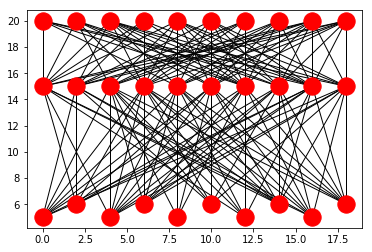

In [392]:
for pos in (position):
    print(position[pos])
nx.drawing.nx_pylab.draw_networkx(g, position, with_labels=False)

In [76]:
def run_num(test_space, runs = 1000):
    population_mean = []
    z = test_space.calculator().items()
    for i in range(runs):
        test_space.run()
        data = test_space.calculator()
        population_mean.append(sum(data['inclination'])/len(data['inclination']))
    return population_mean

mean_over_x = []
for x in range(1, 11):
    test_space = remake_all(x, 10, 100)
    pop_mean = run_num(test_space)
    mean_over_x.append(pop_mean)

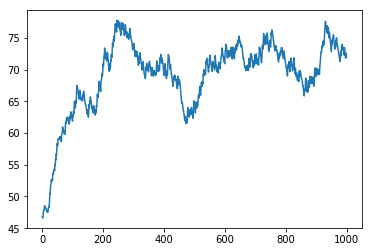

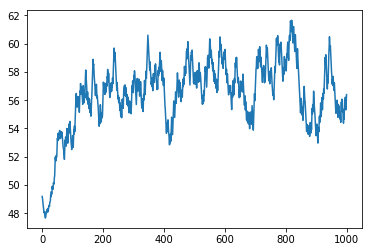

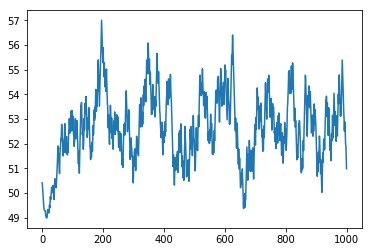

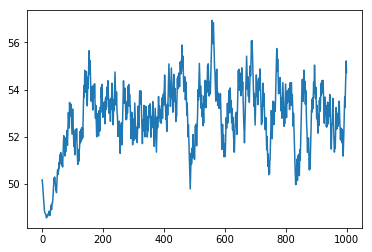

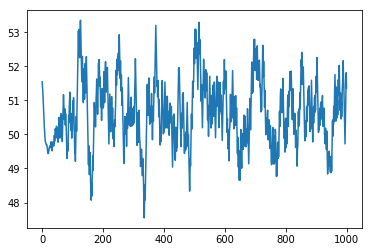

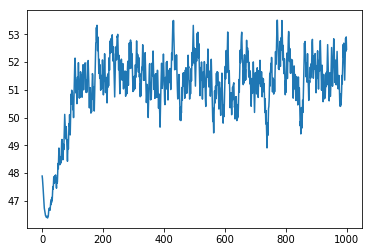

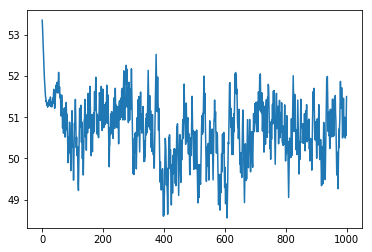

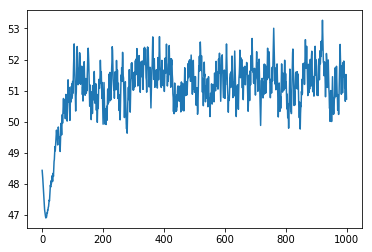

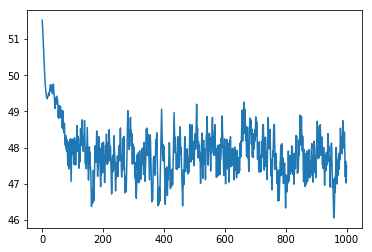

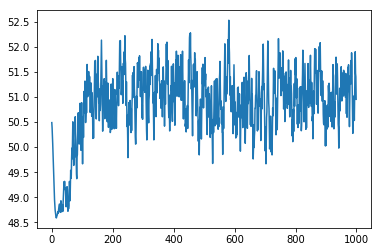

In [77]:
import matplotlib.pyplot as plt
for i in mean_over_x:
    plt.plot(i)
    plt.show()

In [359]:
for x, bias in test_space.calculator().items():
    print(x, bias, '\n')

bias [None, None, None, {0: 1.0, 1: 1.0, 2: 1.0}, {1: 1.0, 2: 1.0}, {0: 1.0, 1: 1.0, 2: 1.0}, {0: 1.0, 2: 1.0}, {0: 1.0, 1: 1.0}, {4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0}, {3: 1.0, 4: 1.0, 6: 1.0, 7: 1.0}, {3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}, {3: 1.0, 4: 1.0, 5: 1.0, 7: 1.0}, {3: 1.0, 5: 1.0, 7: 1.0}, {4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0}, {5: 1.0}, {3: 1.0, 5: 1.0}, {7: 1.0}, {3: 1.0, 5: 1.0, 6: 1.0, 7: 1.0}] 

inclination [75, 50, 25, 49.280346076899654, 38.37885515485186, 49.04235482805196, 49.516209959159625, 64.30555375309824, 49.608603116441614, 49.109207582643066, 46.42348031833564, 50.66358128548243, 54.65547894019112, 49.25313874822366, 49.050069747097176, 49.32485615162076, 64.00161017502352, 51.59720436110482] 

forward [[7, 5, 6, 3], [5, 7, 3, 4], [5, 3, 4, 6], [17, 15, 12, 9, 11, 10], [10, 11, 8, 9, 13], [11, 10, 15, 13, 17, 14, 8, 12], [9, 10, 8, 17, 13], [16, 17, 13, 9, 11, 8, 12], None, None, None, None, None, None, None, None, None, None] 

backward [None, None, None, [0, 1, 2], [1, 2

In [59]:
for node in test_space.return_nodes():
    print(node.info_recieved)

[62.0273273287892, 45.54516966930081, 52.6128361492313, 64.12509657163373, 65.70710414292128, 49.24938615407138, 54.22753792817153, 55.13925469003989, 65.86093547528256, 48.44514423467644]
[33.20778723531403, 21.45411470328389, 20.039591982515788, 32.77730035977627, 6.193521062973627, 21.95488989184269, 14.798352213143875, 16.902469135191634, 27.713414152992595, 16.16524634618745]
[83.75666172835388, 49.80132917060679, 74.01711670007573, 62.89813526831117, 92.74695346444366, 72.83960032323968, 65.26044185878148, 84.2861655124076, 73.86528779423159, 80.65819440851027]
[[[2, 83.75666172835388, 3.6322387583044993]], [[2, 49.80132917060679, 1.9830078565882785]], [[2, 74.01711670007573, 2.8044805344962205]], [[2, 62.89813526831117, 2.231234570227881]], [[2, 92.74695346444366, 3.1648154707027616]], [[2, 72.83960032323968, 2.348584297304297]], [[2, 65.26044185878148, 1.9623148733992652]], [[2, 84.2861655124076, 2.4081106873415283]], [[2, 73.86528779423159, 1.9789889153171587]], [[2, 80.658194

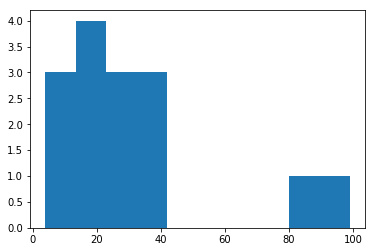

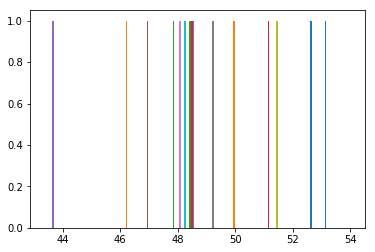

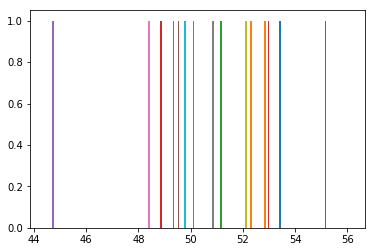

In [84]:
test_space = remake_all(10, 5, 10)
for i in range(300):
    if i%100 == 0:
        data = test_space.calculator(-1)['inclination']
        plt.hist(data[10:])
        plt.show()
    test_space.run()

In [292]:
x = x.split('\n')

In [297]:
y = set(x)

In [298]:
print(y)

{'1', '0'}


In [60]:
x = [1,2,4]
sorted(x, key = lambda x: x*-1)

[4, 2, 1]

[10, 50, 90]


TypeError: unsupported operand type(s) for -: 'int' and 'node'

In [87]:
print(test_space.vote([45,55,90]))

[45, 55, 90]
inclination is [49.80201374], and min pos is 45
inclination is [48.44968714], and min pos is 45
inclination is [50.12707515], and min pos is 55
inclination is [50.84355095], and min pos is 55
inclination is [48.32282889], and min pos is 45
inclination is [52.55319488], and min pos is 55
inclination is [51.1556152], and min pos is 55
inclination is [50.17637366], and min pos is 55
inclination is [48.88073914], and min pos is 45
inclination is [48.1947047], and min pos is 45
{45: 5, 55: 5, 90: 0}


In [2]:
len(('''try
try
try
try
try
try
try
try
try
try
try
try
try
try
try
try
try
try
try
try
try
try
try
try''').split())

24